In [32]:
import numpy as np
import pandas as pd
import csv

In [33]:
#csv_file_path = 
train_df = pd.read_csv('../raw_data/sales_train_validation.csv')
prices_df = pd.read_csv('../raw_data/sell_prices.csv')
calendar_df = pd.read_csv('../raw_data/calendar.csv')

In [34]:
train_df_filtered = train_df.iloc[:5000,:]

In [35]:
train_df_filtered

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,HOUSEHOLD_1_440_CA_1_validation,HOUSEHOLD_1_440,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,0,0,0,0,...,0,2,5,2,0,2,1,1,2,1
996,HOUSEHOLD_1_441_CA_1_validation,HOUSEHOLD_1_441,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,0,0,0,0,...,7,8,11,3,2,0,2,2,4,5
997,HOUSEHOLD_1_442_CA_1_validation,HOUSEHOLD_1_442,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,HOUSEHOLD_1_443_CA_1_validation,HOUSEHOLD_1_443,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,0,0,0,0,...,0,2,2,0,0,6,1,0,2,0


In [36]:
train_df_sample = train_df_filtered

In [37]:
train_df_sample = train_df_sample.melt(id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'])

In [38]:
train_df_sample.rename(columns={'variable': 'd', 'value':'sales'},inplace=True)

In [39]:
merge_df = train_df_sample.merge(calendar_df,on='d',how='left')
merge_df

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912995,HOUSEHOLD_1_440_CA_1_validation,HOUSEHOLD_1_440,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1913,1,2016-04-24,11613,...,2,4,2016,NaN,NaN,NaN,NaN,0,0,0
1912996,HOUSEHOLD_1_441_CA_1_validation,HOUSEHOLD_1_441,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1913,5,2016-04-24,11613,...,2,4,2016,NaN,NaN,NaN,NaN,0,0,0
1912997,HOUSEHOLD_1_442_CA_1_validation,HOUSEHOLD_1_442,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1913,0,2016-04-24,11613,...,2,4,2016,NaN,NaN,NaN,NaN,0,0,0
1912998,HOUSEHOLD_1_443_CA_1_validation,HOUSEHOLD_1_443,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1913,0,2016-04-24,11613,...,2,4,2016,NaN,NaN,NaN,NaN,0,0,0


In [40]:
merge_df = merge_df.merge(prices_df,on=['store_id', 'item_id','wm_yr_wk'],how='left')
merge_df

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912995,HOUSEHOLD_1_440_CA_1_validation,HOUSEHOLD_1_440,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1913,1,2016-04-24,11613,...,4,2016,NaN,NaN,NaN,NaN,0,0,0,14.97
1912996,HOUSEHOLD_1_441_CA_1_validation,HOUSEHOLD_1_441,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1913,5,2016-04-24,11613,...,4,2016,NaN,NaN,NaN,NaN,0,0,0,2.77
1912997,HOUSEHOLD_1_442_CA_1_validation,HOUSEHOLD_1_442,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1913,0,2016-04-24,11613,...,4,2016,NaN,NaN,NaN,NaN,0,0,0,8.97
1912998,HOUSEHOLD_1_443_CA_1_validation,HOUSEHOLD_1_443,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1913,0,2016-04-24,11613,...,4,2016,NaN,NaN,NaN,NaN,0,0,0,2.47


In [41]:
merge_df["date"] = pd.to_datetime(merge_df["date"])

In [42]:
merge_df.set_index("date",inplace=True)

In [43]:
timeseries = merge_df[["sales","id"]]

In [44]:
timeseries

,sales,id
date,,
2011-01-29,0,HOBBIES_1_001_CA_1_validation
2011-01-29,0,HOBBIES_1_002_CA_1_validation
2011-01-29,0,HOBBIES_1_003_CA_1_validation
2011-01-29,0,HOBBIES_1_004_CA_1_validation
2011-01-29,0,HOBBIES_1_005_CA_1_validation
...,...,...
2016-04-24,1,HOUSEHOLD_1_440_CA_1_validation
2016-04-24,5,HOUSEHOLD_1_441_CA_1_validation
2016-04-24,0,HOUSEHOLD_1_442_CA_1_validation


In [45]:
# Pivot the DataFrame
pivot_df = timeseries.pivot_table(index='date', columns='id', values='sales', fill_value=0)

In [46]:
pivot_df

id,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,HOUSEHOLD_1_435_CA_1_validation,HOUSEHOLD_1_436_CA_1_validation,HOUSEHOLD_1_437_CA_1_validation,HOUSEHOLD_1_438_CA_1_validation,HOUSEHOLD_1_439_CA_1_validation,HOUSEHOLD_1_440_CA_1_validation,HOUSEHOLD_1_441_CA_1_validation,HOUSEHOLD_1_442_CA_1_validation,HOUSEHOLD_1_443_CA_1_validation,HOUSEHOLD_1_444_CA_1_validation
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,0.0,...,0.0,2.0,6.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
2011-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,0.0,7.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
2011-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,...,0.0,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
2011-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,5.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-20,1.0,1.0,1.0,0.0,1.0,0.0,1.0,4.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,6.0,0.0
2016-04-21,3.0,0.0,0.0,1.0,2.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0,1.0,2.0
2016-04-22,0.0,0.0,1.0,3.0,2.0,2.0,0.0,3.0,0.0,2.0,...,0.0,0.0,2.0,2.0,0.0,1.0,2.0,0.0,0.0,2.0


In [47]:
from dtaidistance.dtw import distance_matrix_fast

In [48]:
# Convert DataFrame to numpy array
data_array = pivot_df.to_numpy()

data_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 2.],
       [1., 0., 1., ..., 0., 2., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [49]:
product_ids = pivot_df.columns

In [50]:
# Now you can pass the numpy array to the distance_matrix_fast function
ds = distance_matrix_fast(data_array,parallel=True)

In [51]:
ds

array([[ 0.        , 54.79963504, 53.82378656, ..., 66.09841148,
        68.30080527, 64.5987616 ],
       [54.79963504,  0.        , 56.45352071, ..., 73.33484847,
        72.46378406, 68.24221567],
       [53.82378656, 56.45352071,  0.        , ..., 67.9337913 ,
        70.83078427, 70.88018059],
       ...,
       [66.09841148, 73.33484847, 67.9337913 , ...,  0.        ,
        44.57577818, 52.93392107],
       [68.30080527, 72.46378406, 70.83078427, ..., 44.57577818,
         0.        , 48.77499359],
       [64.5987616 , 68.24221567, 70.88018059, ..., 52.93392107,
        48.77499359,  0.        ]])

/tmp/ipykernel_13248/1657574572.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(ds, method='complete')  # distance_matrix is your distance matrix


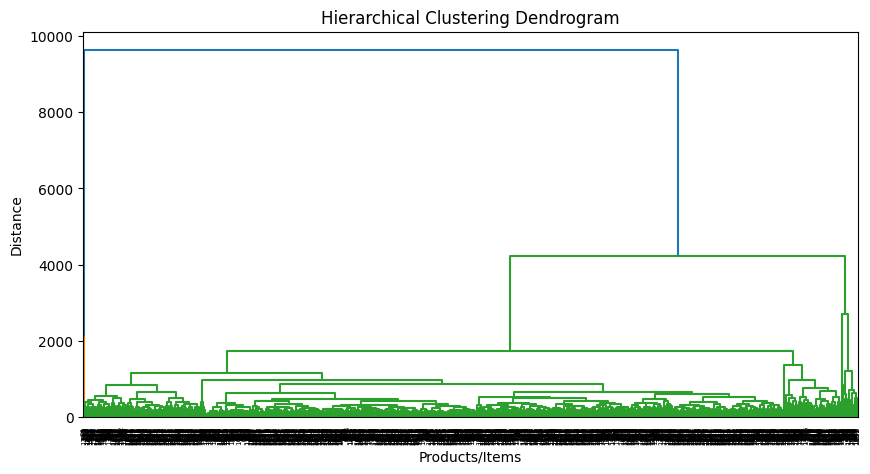

Cluster 1: ['HOBBIES_1_037_CA_1_validation']
Cluster 2: []
Cluster 3: ['HOBBIES_1_001_CA_1_validation', 'HOBBIES_1_003_CA_1_validation', 'HOBBIES_1_011_CA_1_validation', 'HOBBIES_1_023_CA_1_validation', 'HOBBIES_1_026_CA_1_validation', 'HOBBIES_1_039_CA_1_validation', 'HOBBIES_1_040_CA_1_validation', 'HOBBIES_1_058_CA_1_validation', 'HOBBIES_1_064_CA_1_validation', 'HOBBIES_1_065_CA_1_validation', 'HOBBIES_1_072_CA_1_validation', 'HOBBIES_1_074_CA_1_validation', 'HOBBIES_1_075_CA_1_validation', 'HOBBIES_1_078_CA_1_validation', 'HOBBIES_1_082_CA_1_validation', 'HOBBIES_1_089_CA_1_validation', 'HOBBIES_1_091_CA_1_validation', 'HOBBIES_1_094_CA_1_validation', 'HOBBIES_1_095_CA_1_validation', 'HOBBIES_1_097_CA_1_validation', 'HOBBIES_1_107_CA_1_validation', 'HOBBIES_1_124_CA_1_validation', 'HOBBIES_1_133_CA_1_validation', 'HOBBIES_1_137_CA_1_validation', 'HOBBIES_1_138_CA_1_validation', 'HOBBIES_1_164_CA_1_validation', 'HOBBIES_1_192_CA_1_validation', 'HOBBIES_1_195_CA_1_validation', 'HOBB

In [52]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Step 1: Hierarchical Clustering
Z = linkage(ds, method='complete')  # distance_matrix is your distance matrix

# Step 2: Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Products/Items')
plt.ylabel('Distance')
plt.show()

# Step 3: Cut Dendrogram
num_clusters = 10  # You can choose the number of clusters based on your requirements
clusters = fcluster(Z, num_clusters, criterion='maxclust')

# Step 4: Assign Clusters
product_cluster_mapping = {product_id: cluster for product_id, cluster in zip(product_ids, clusters)}

# Step 5: Inspect Groups
for cluster_id in range(1, num_clusters + 1):
    cluster_products = [product_id for product_id, cluster in product_cluster_mapping.items() if cluster == cluster_id]
    print(f"Cluster {cluster_id}: {cluster_products}")

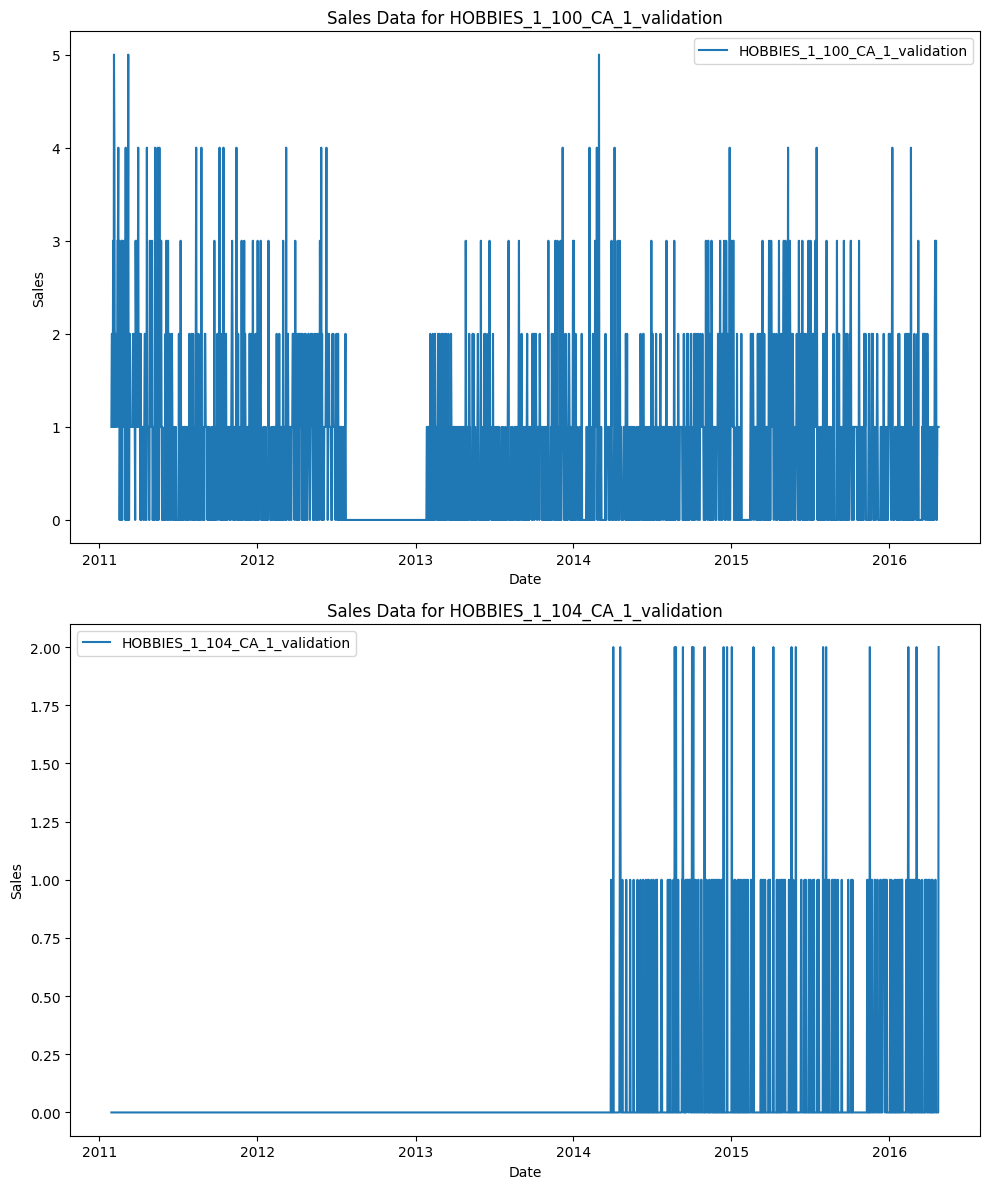

In [53]:
cluster_1_items = ['HOBBIES_1_100_CA_1_validation', 'HOBBIES_1_104_CA_1_validation']  # List all items in Cluster 1
cluster_1_data = timeseries[timeseries['id'].isin(cluster_1_items)]  # Assuming sales_data is your original DataFrame

# Plot sales data for Cluster 1 items
plt.figure(figsize=(10, 6 * len(cluster_1_items)))
for i, item in enumerate(cluster_1_items, start=1):
    plt.subplot(len(cluster_1_items), 1, i)
    plt.plot(cluster_1_data[cluster_1_data['id'] == item].index, cluster_1_data[cluster_1_data['id'] == item]['sales'], label=item)
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.title(f'Sales Data for {item}')
    plt.legend()

plt.tight_layout()
plt.show()